In [1]:
import torch
import numpy as np
import torchvision
from torchvision.utils import make_grid, save_image
# See https://pytorch.org/docs/stable/torchvision/utils.html
# for make_grid, save_image
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
from models import *


%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')

In [2]:
import sys
sys.executable

'/home/lsm/miniconda3/envs/pt/bin/python'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 32, 32])
torch.Size([16])

Ground truth labels:
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship


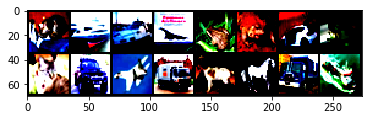

In [4]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

data_iter = iter(testloader)
images, labels = data_iter.next()
print(images.shape)
print(labels.shape)
print()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print("Ground truth labels:")
print(' '.join('%5s' % classes[int(label)] for label in list(labels.numpy())))
show(make_grid(images))
save_image(images, filename='gt_label.png')

In [5]:
net_list = [MobileNetV2(), VGG('VGG16'), PreActResNet18(), ResNeXt29_2x64d(), ResNet50(), DPN92(), 
           ResNeXt29_32x4d(), DenseNet121(), ResNet18(), ResNet101()]
for net in net_list:
    net_name = net.name
    save_path = './checkpoint/{0}_ckpt.pth'.format(net.name)
    net = net.to(device)
    if device == 'cuda':
        net = torch.nn.DataParallel(net)
        cudnn.benchmark = True
    checkpoint = torch.load(save_path)
    net.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']
    print("best_acc of " + net_name + ": ",best_acc)
    outputs = net(images)
    _, predicted = outputs.max(1)
    print(' '.join('%5s' % classes[int(pred)] for pred in list(predicted.cpu().numpy())))
    print()

best_acc of MobileNetV2:  92.64
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship

best_acc of VGG16:  94.27
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship

best_acc of PreActResNet18:  94.7
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship

best_acc of ResNeXt29_2x64d:  95.09
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  frog

best_acc of resnet50:  95.22
  cat  ship   car plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship

best_acc of DPN92:  95.42
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship

best_acc of ResNeXt29_32x4d:  95.49
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship

best_acc of DenseNet121:  95.55
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truc